>>>>>>> # **PHASE 3 PROJECT**

* Name: Sharon Wanjiku Kimani

### INTRODUCTION




The communication technology industry is one of the most competitive industries nowadays. The main problem that practically all telecommunications industries worldwide are currently facing is customer churn.

Churn, in the context of telecommunications, is the process by which customers leave a business and stop using the services it provides either because they are unhappy with those services or because they can find better options from other network providers at more reasonable prices. This could result in a loss of revenue or profit for the business. Additionally, keeping clients has grown to be a challenging task. In order to provide their clients with the best services possible and keep them satisfied, businesses are working hard to introduce new cutting-edge applications and technology.

Since losing them would result in a large loss of revenue for the business, it is imperative to identify those clients who are likely to quit the organization in the near future in advance. This project seeks to accomplish this procedure, which is known as churn prediction.

## Problem statement
Business is becoming extremely saturated in this competitive world. SyriaTel telecommunications company  wants to take the required actions to retain customers in order to stabilize their market value because the cost of recruiting new customers is significantly higher than the cost of maintaining existing customers and also in order to  reduce losses incurred from customer churn.

## **Objectives**

main objective: To predict customer churn using a classification algorithm model

specific objectives:
* To do exploratory data analysis on the data
* To fit different classification algorithm models to determine which one works best for churn prediction
* To select the best model 
* To make predictions using the selected model
* To check the accuracy of the predicted variables


>> # **Data Understanding**
This data was obtained from kaggle , [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download).


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score





In [2]:

df= pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This dataset has 21 columns; 4 categorical, 16 numerical and 1 of type bool(which is our target column) and 3333 rows/observations. The data doesn't seem to have any missing values.
To understand the data better, let's check the value counts of each column

In [4]:
def check_value_counts(data):
  for column in data.columns:
    print(f'value counts for {column}')
    print(data[column].value_counts())
    print('------------------------------------------','\n')

check_value_counts(df)

value counts for state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
------------------------------------------ 

value counts for account length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account length, Length: 212, dtype: int64
------------------------------------------ 

value counts for area code
415    1655
510     840
408     838
Name: area code, dtype: int64
------------------------------------------ 

value counts for phone 

The data doesn't have any data inconsistencies.

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


As seen above, the data is in different scales thus for modelling processes, we'll have to scale the data to be in the same scale.

>> # **Data Analysis**

In [6]:
# checking for missing values and duplicates
def check_missing_values(data):
  return data.isna().sum()

def check_duplicates (data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates


In [7]:
check_duplicates(df)

0

In [8]:
check_missing_values(df)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data has no duplicates nor any missing values

In [9]:
#assuming phone number is the unique identifier of the customers, let,s check for duplicate
duplicated_number= df[df['phone number'].duplicated(keep=False)]
duplicated_number

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


The column phone number doesn't have any duplicates

#### outliers

IQR for account length column: 53.0
Number of outliers in account length column: 18
IQR for area code column: 102.0
Number of outliers in area code column: 0
IQR for number vmail messages column: 20.0
Number of outliers in number vmail messages column: 1
IQR for total day minutes column: 72.70000000000002
Number of outliers in total day minutes column: 25
IQR for total day calls column: 27.0
Number of outliers in total day calls column: 23
IQR for total day charge column: 12.36
Number of outliers in total day charge column: 25
IQR for total eve minutes column: 68.70000000000002
Number of outliers in total eve minutes column: 24
IQR for total eve calls column: 27.0
Number of outliers in total eve calls column: 20
IQR for total eve charge column: 5.84
Number of outliers in total eve charge column: 24
IQR for total night minutes column: 68.30000000000001
Number of outliers in total night minutes column: 30
IQR for total night calls column: 26.0
Number of outliers in total night calls colu

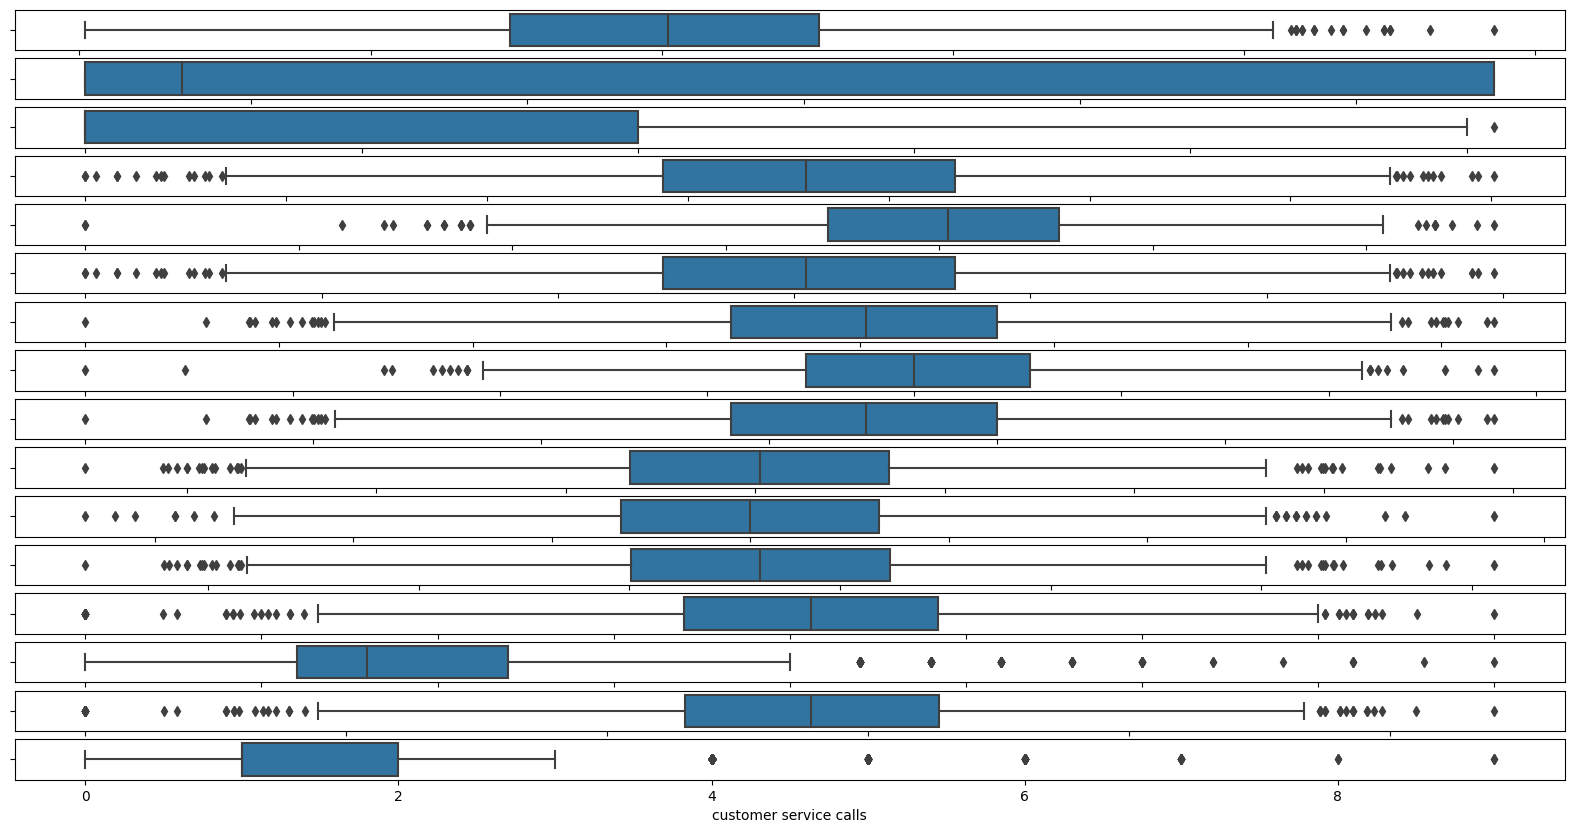

In [10]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()


num=df.select_dtypes('number')
columns=num.columns
check_outliers(df, columns)

The data has outliers but we won't remove them because that information could be useful to predict customer churn

## Univariate EDA

Let's understand the target variable better,
2850 customers did not churn but 283 customers did churn( this shows that our data has class imbalance problems so we should put this into consideration when modelling). 

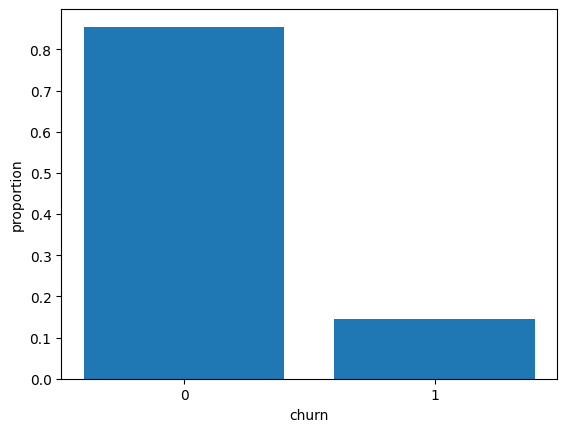

In [11]:
d= df.churn.value_counts(normalize=True)
plt.bar(d.index, d.values)
plt.xlabel('churn')
plt.ylabel('proportion')
plt.xticks([0, 1])
plt.show();

The above plot shows the distribution of our target variable and we can see that most of the customers did not churn.
let's visualize the distribution of our predicor variables

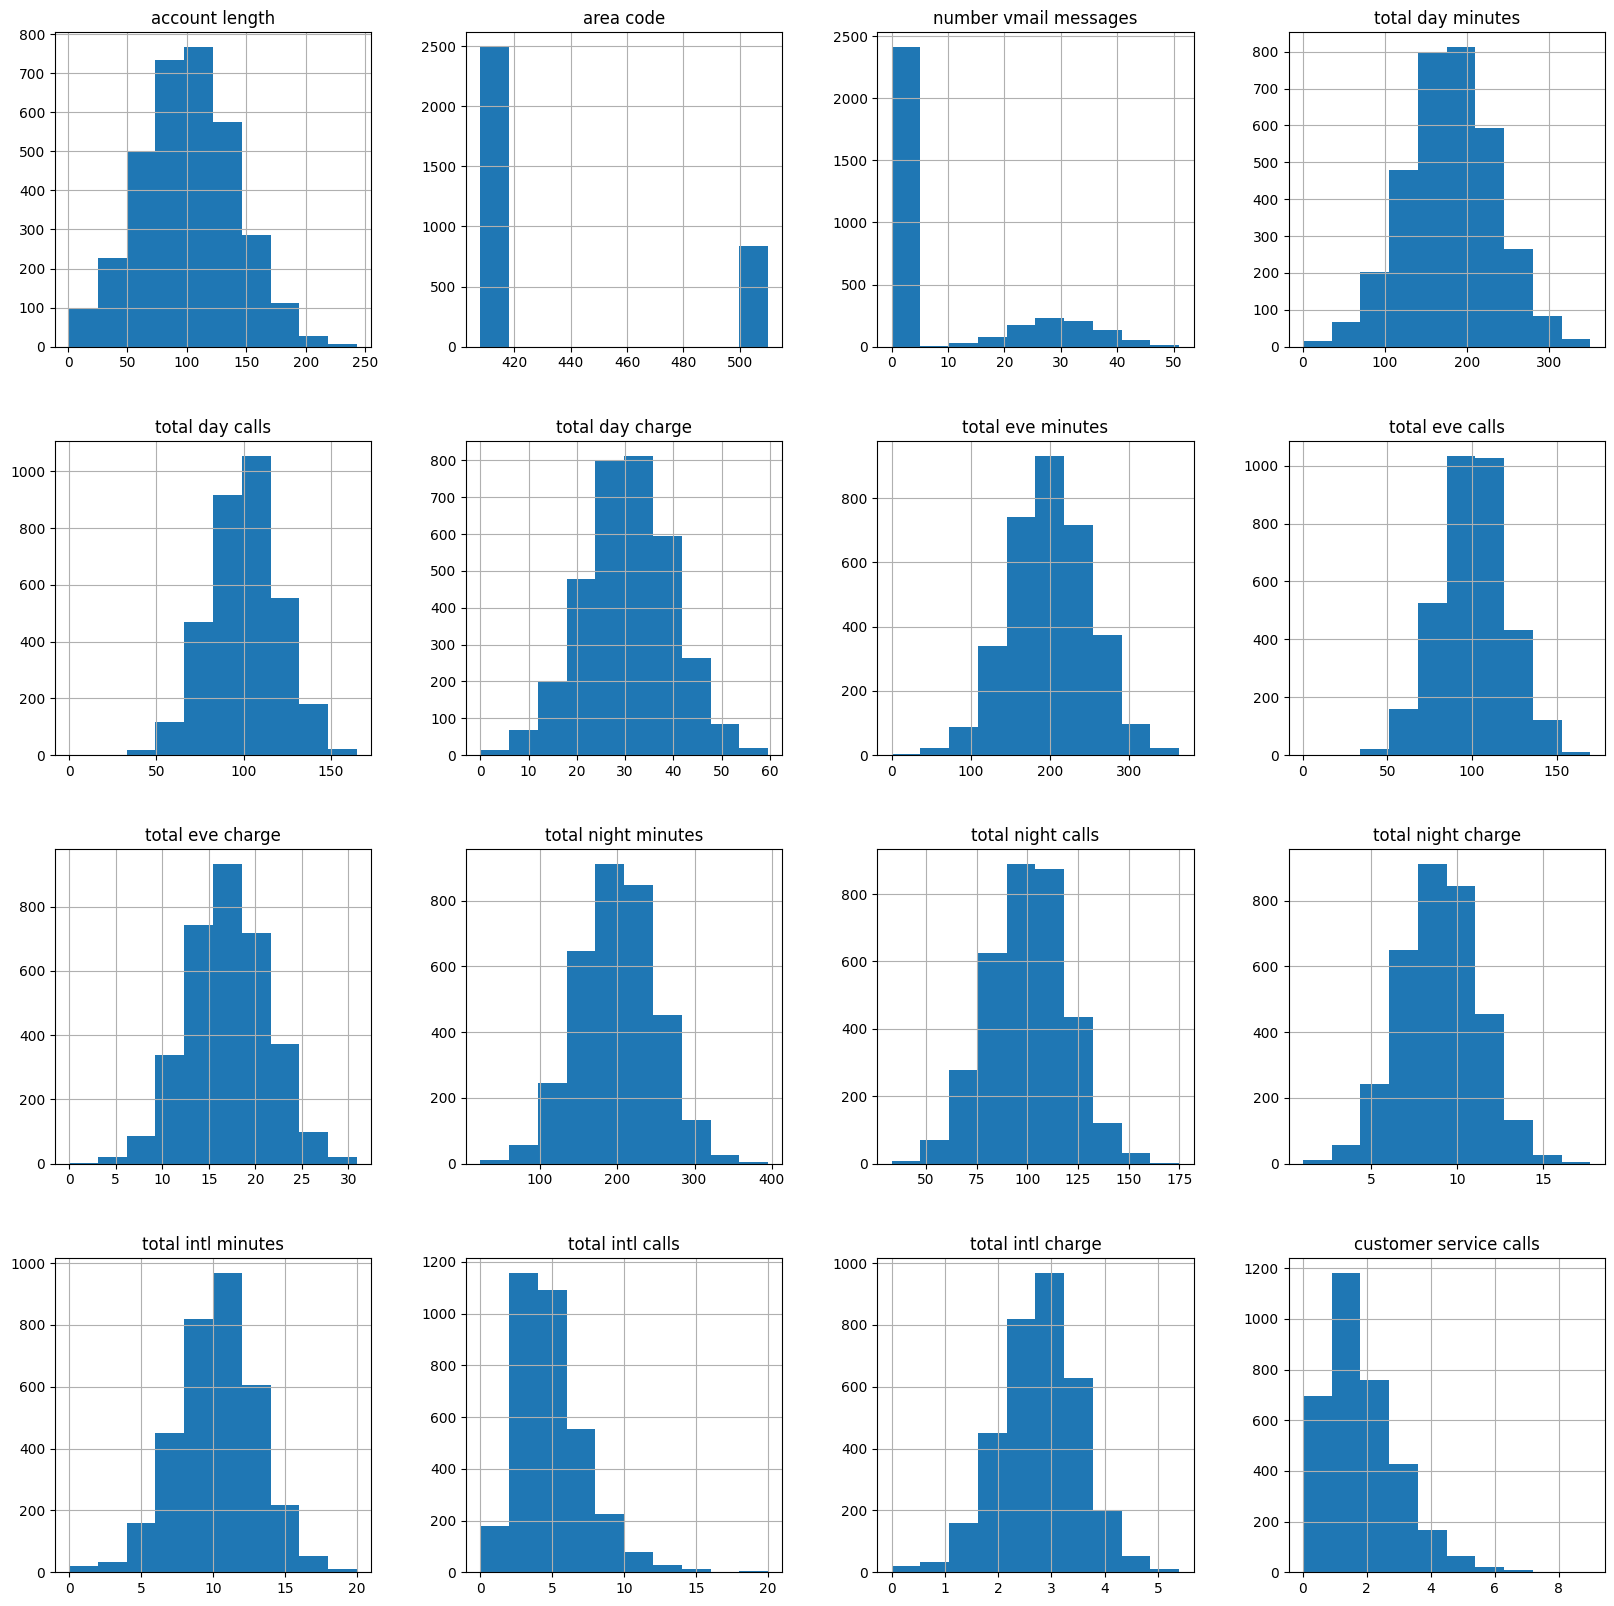

In [12]:
df.hist(figsize=(20,20));# distribution of numerical predictors

The predictor variables;account length, total day minutes,total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge , total intl minutes and total intl charge seem to be fairly normally distributed, total intl calls and customer service calls seem to be normally distributed but skewed to the right, area code is a discrete categorical column and number of vmail messages, most of them were 0 but the rest seem to have a platykurtic distribution. 


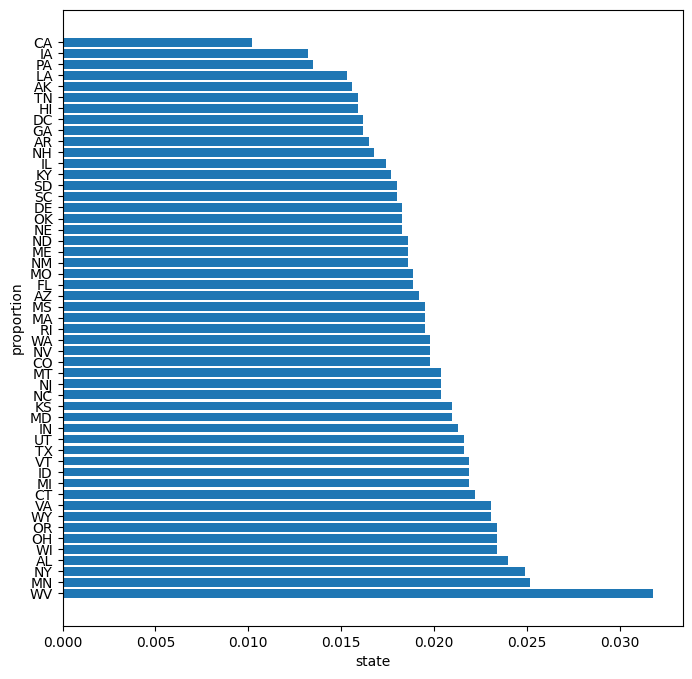

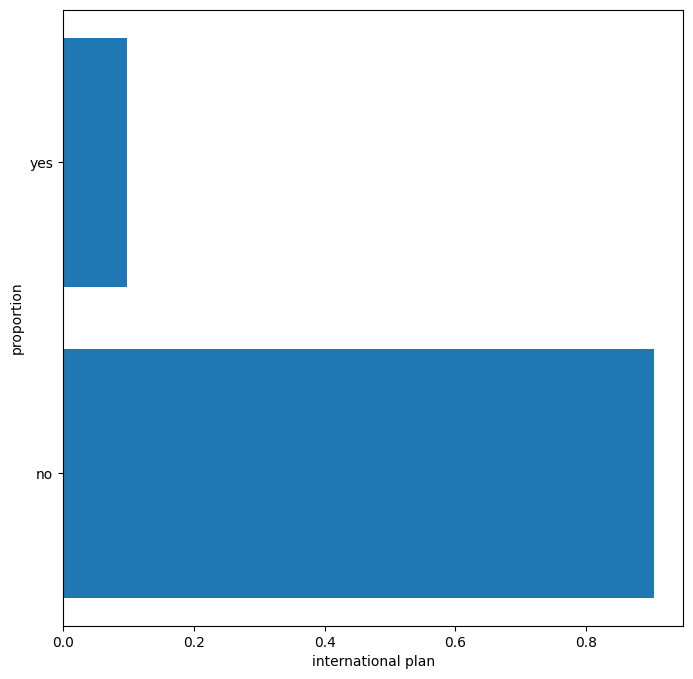

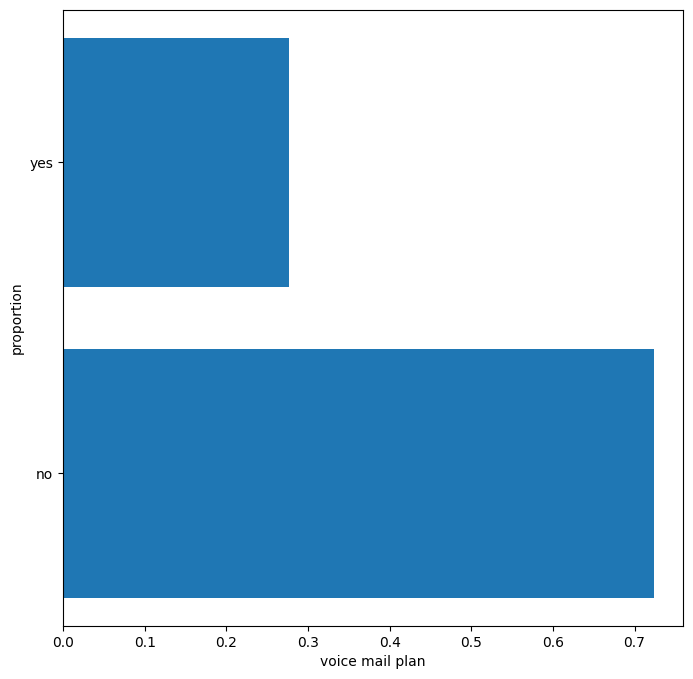

In [13]:
def categorical_col_distribution(data):
  for col in data.columns:
    plt.subplots(figsize=(8,8))
    d= data[col].value_counts(normalize=True)
    plt.barh(d.index, d.values)
    plt.xlabel(f'{col}')
    plt.ylabel('proportion')
    plt.show();

cat=df.select_dtypes('object').drop('phone number', axis=1)
categorical_col_distribution(cat)

Wv state seems to be having most of the customers and CA has the least customers, most of the customers don't have an international plan and also most of them don't have a voicemail plan, explaining why the majority of the data in the number of voicemail messages is 0.

## Bivariate EDA

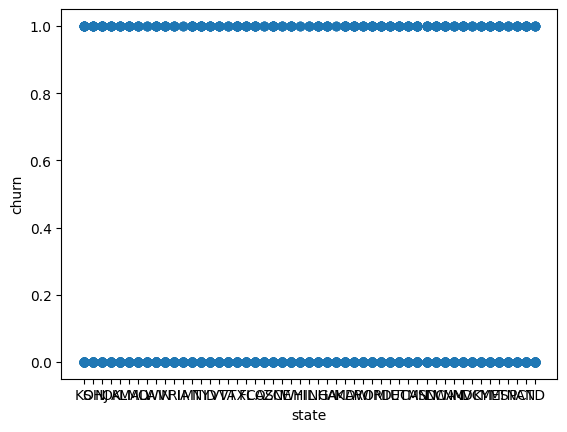

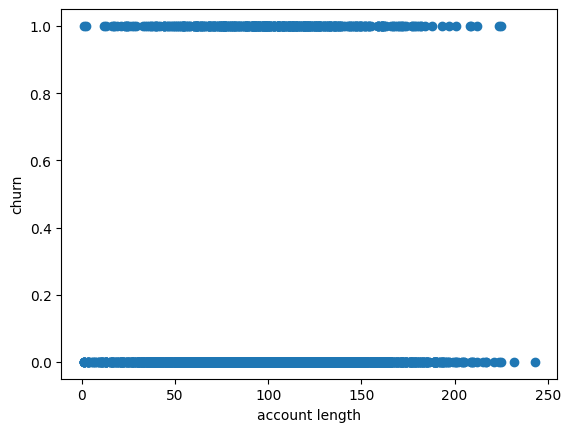

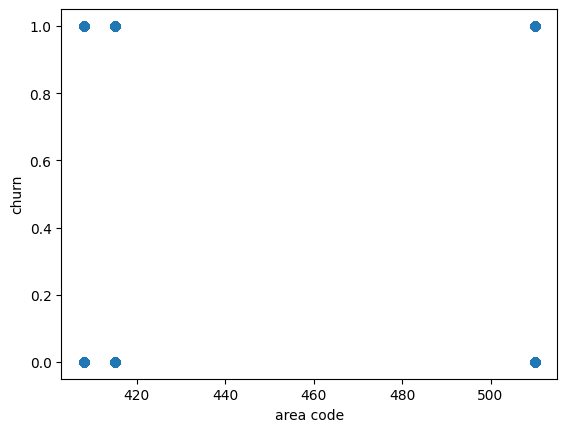

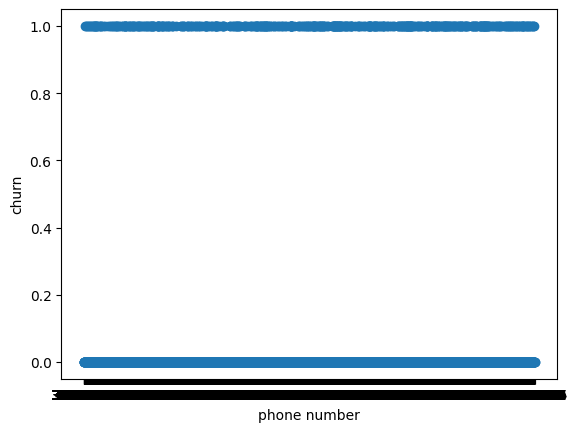

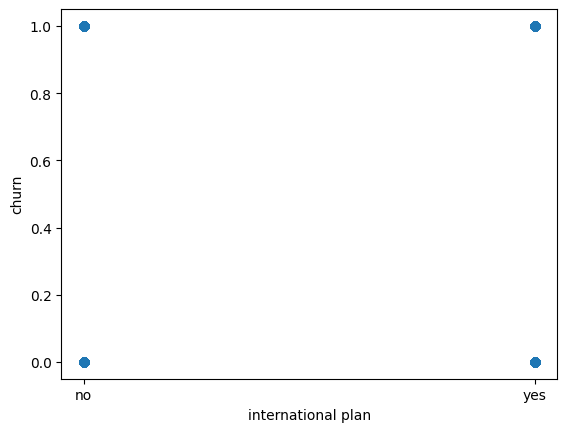

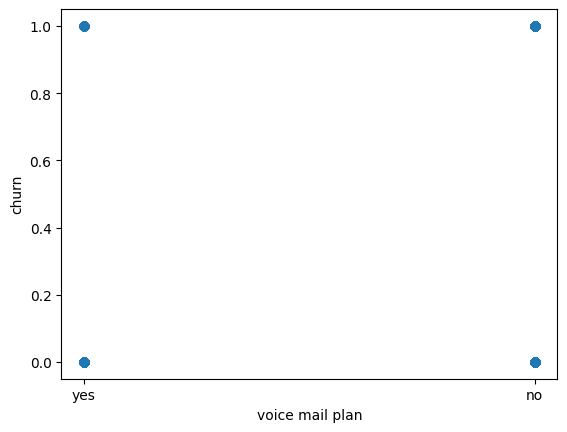

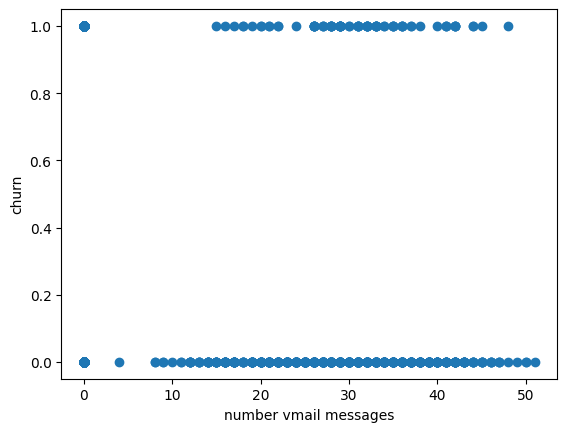

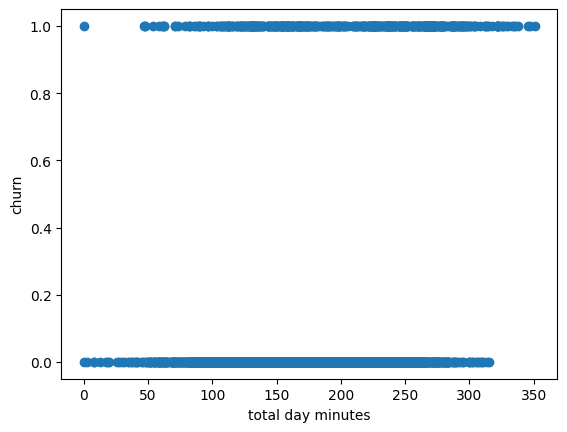

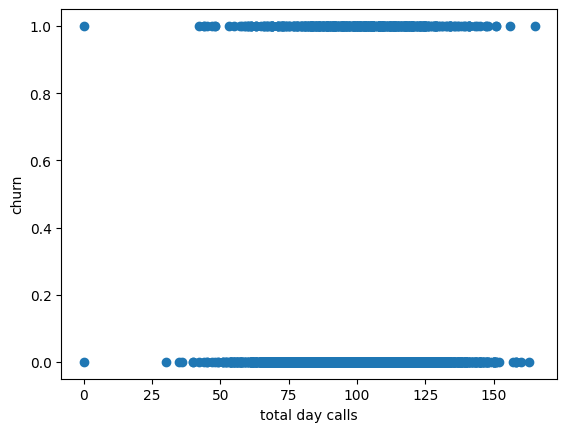

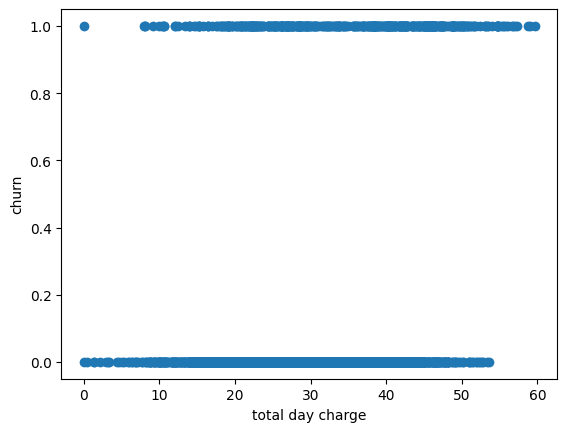

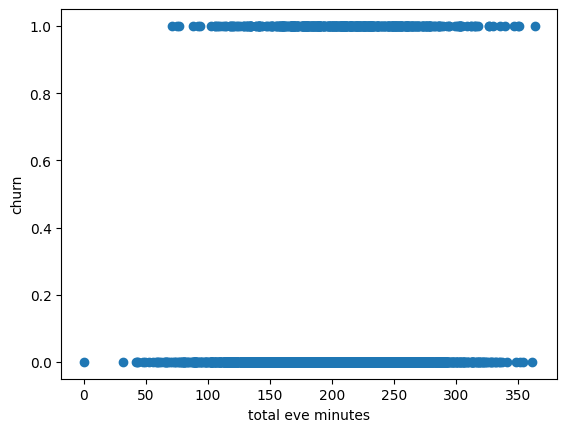

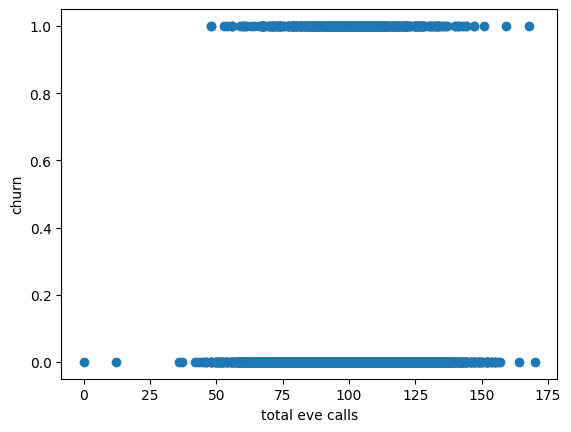

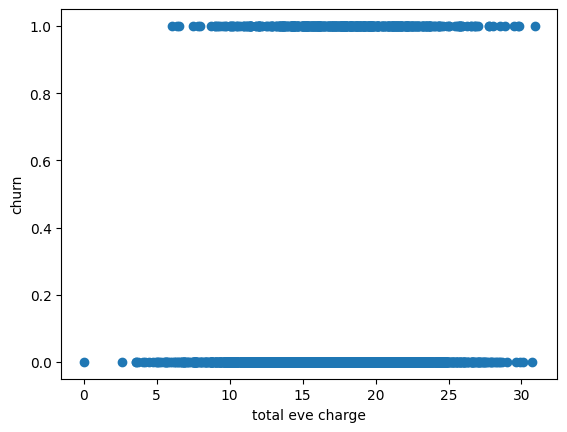

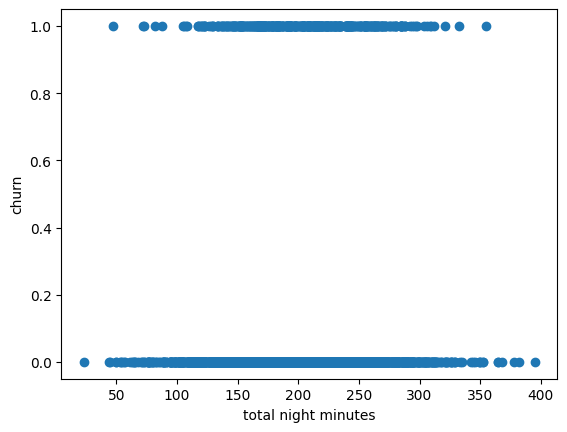

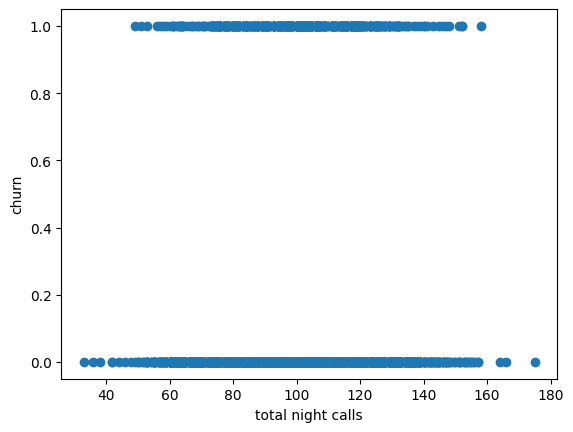

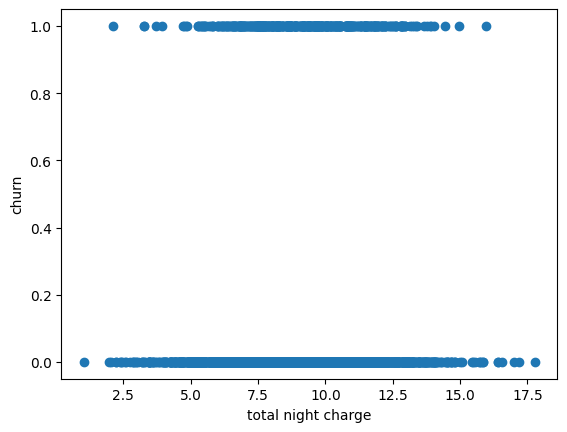

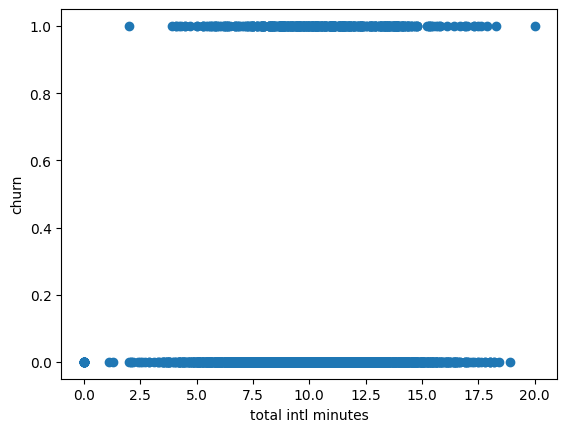

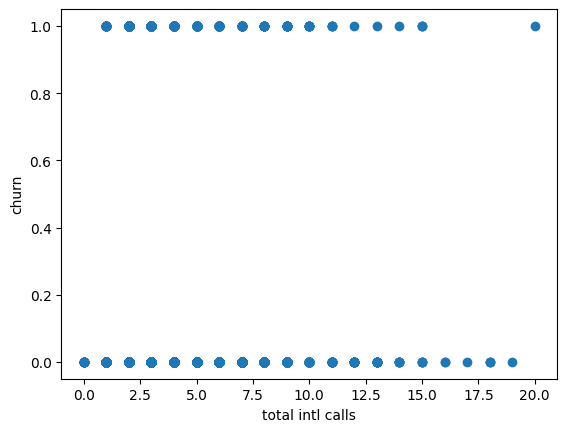

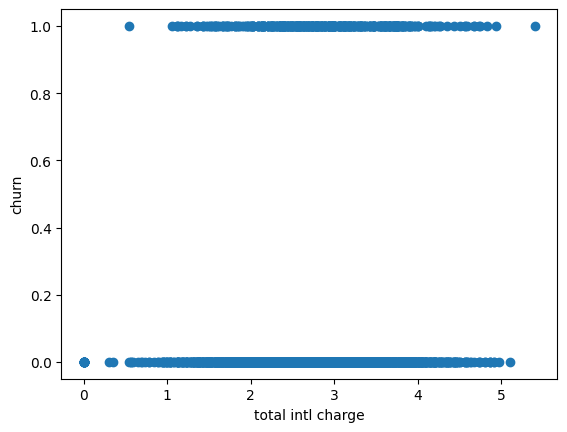

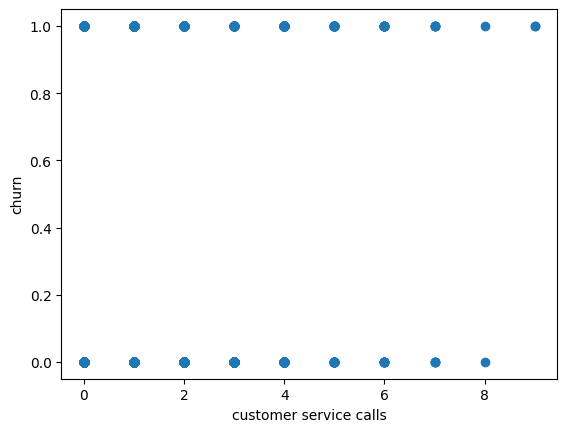

In [14]:
specific_col = 'churn'
for col in df.columns:
    if col != specific_col:
        plt.scatter(df[col], df[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

As seen from the above scatter plots of the predictor variables against our target variable, churn, we can see that the proportion of the target variable is evenly distributed among all the predictor variables. This shows that our predictor variables are suitable to be used for churn predictions. Let's see how each of the variables are related to one another.

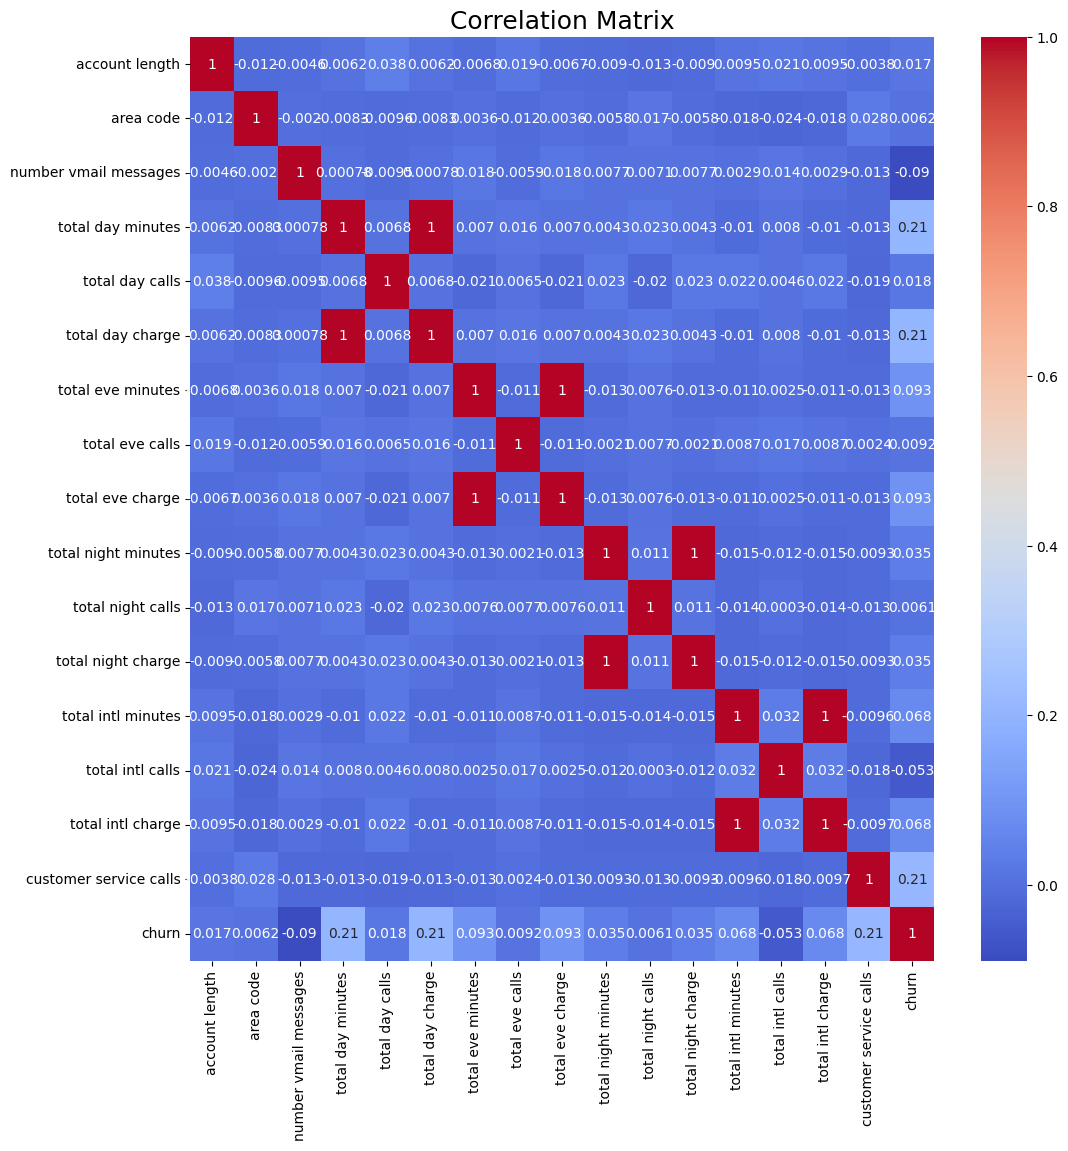

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();

We can see that some predictors are perfectly correlated with each other thus using them all will bring about multicollinearity issues

## multicollinearity

Let's check for the variables that are highly correlated to each other so as to determine which variables to drop so as to avoid multicollinearity issues.

In [16]:
df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous i
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999993
"(total intl minutes, total intl charge)",0.999993


The variables; (total day charge, total day minutes), (total eve minutes, total eve charge), (total night minutes, total night charge) and  (total intl charge, total intl minutes) are highly correlated with one another so let's drop one for each pair.

In [17]:
#removing some features to prevent multicollinearity
df.drop(['total day charge', 'total eve minutes', 'total night charge','total intl minutes','phone number'], axis=1, inplace=True)
df.columns
#we dropped phone number too because it is the unique identifier of the customers

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

The final data has 16 columns; 4 categorical and 12 numerical columns and 3333 observations. For modelling purposes, we'll need to convert the categorical features to numerical ones. for churn, international plan and voice male plan, they have only 2 categories thus we'll convert them to be binary columns using ordinal encoder but for state, we'll one hot encode it to have dummy variables.

## Transforming categorical variables

In [19]:
def encode_columns(df, columns):
    # Create a copy of the dataframe to avoid modifying the original dataframe
    encoded_df = df.copy()
    
    # Extract the columns from the dataframe
    columns_to_encode = encoded_df[columns]
    
    # Initialize the ordinal encoder
    ordinal_encoder = OrdinalEncoder()
    
    # Fit and transform the columns using ordinal encoder
    encoded_data = ordinal_encoder.fit_transform(columns_to_encode)
    
    # Replace the original columns in the dataframe with the encoded columns
    encoded_df[columns] = encoded_data
    
    return encoded_df


columns= ['churn','voice mail plan','international plan']
data= df.copy()
data=encode_columns(df, columns)
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve calls,total eve charge,total night minutes,total night calls,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0.0,1.0,25,265.1,110,99,16.78,244.7,91,3,2.70,1,0.0
1,OH,107,415,0.0,1.0,26,161.6,123,103,16.62,254.4,103,3,3.70,1,0.0
2,NJ,137,415,0.0,0.0,0,243.4,114,110,10.30,162.6,104,5,3.29,0,0.0
3,OH,84,408,1.0,0.0,0,299.4,71,88,5.26,196.9,89,7,1.78,2,0.0
4,OK,75,415,1.0,0.0,0,166.7,113,122,12.61,186.9,121,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0.0,1.0,36,156.2,77,126,18.32,279.1,83,6,2.67,2,0.0
3329,WV,68,415,0.0,0.0,0,231.1,57,55,13.04,191.3,123,4,2.59,3,0.0
3330,RI,28,510,0.0,0.0,0,180.8,109,58,24.55,191.9,91,6,3.81,2,0.0
3331,CT,184,510,1.0,0.0,0,213.8,105,84,13.57,139.2,137,10,1.35,2,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   float64
 4   voice mail plan         3333 non-null   float64
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [21]:
def ohe_columns(df, columns):
  data= df.copy()
  data= pd.get_dummies(df, columns= columns, drop_first=True)
  return data
    


columns= ['state']
d= data.copy()
data_frame=ohe_columns(d, columns)
data_frame

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0.0,1.0,25,265.1,110,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0.0,1.0,26,161.6,123,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0.0,0.0,0,243.4,114,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1.0,0.0,0,299.4,71,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1.0,0.0,0,166.7,113,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0.0,1.0,36,156.2,77,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0.0,0.0,0,231.1,57,55,13.04,191.3,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0.0,0.0,0,180.8,109,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1.0,0.0,0,213.8,105,84,13.57,139.2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   float64
 3   voice mail plan         3333 non-null   float64
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

>>> # **Modelling**

 we'll fit different classification algorithms to this data to determine the best model ie logistic regression model, decision tree classifier,random tree classifier and knn.

 Before modelling, our data had class imbalance problems, we'll use SMOTE to help with this but first we need to split our data into X and y and also train test split the data.

 Also, Most of the classification algorithms need the data to be scaled/ standardized first before fitting them to the model. so let's standardize the data so that it can be on the same sacle.


## standardizing the data and solving class imbalance problems

In [23]:
y=data_frame['churn']
X= data_frame.drop('churn', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=20)

# standardizing the data
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Set the random seed
random_seed = 42
np.random.seed(random_seed)
# smote
smote= SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
 
y_train_resampled.value_counts()




0.0    1992
1.0    1992
Name: churn, dtype: int64

The class imbalance problems have been resolved and the predictor variables are on the same scale thus the data is fit for modelling.

> # Logistic regression




In [24]:
# let's fit a vanilla logistic regression model
def fit_model(model):
  model.fit(X_train_resampled,y_train_resampled)
  print(model.score(X_train_resampled,y_train_resampled))
  print(model.score(X_test_scaled,y_test))

model= LogisticRegression(random_state= 10)
fit_model(model)


0.7966867469879518
0.763


The baseline model correctly predicts the class of  79.6% of the training set and 76.3% of  the testing set. We can use gridsearch so as to tune the model and improve it's accuracy.

In [25]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
grid={'penalty':['l2','l1'],
      'C':[1,1e10, 1e20,1e15],
      'fit_intercept': [True, False],
      'solver':['lbfgs','liblinear'],
      'l1_ratio': [1,-1]}
def tuning_parameters(model,grid):
  gridsearch=GridSearchCV(model, param_grid= grid, cv=5)
  gridsearch.fit(X_train_resampled,y_train_resampled)
  print(gridsearch.score(X_train_resampled,y_train_resampled))
  print(gridsearch.score(X_test_scaled,y_test))
  return gridsearch

logreg=tuning_parameters(model,grid)
logreg

0.7971887550200804
0.77


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [1, 10000000000.0, 1e+20, 1000000000000000.0],
                         'fit_intercept': [True, False], 'l1_ratio': [1, -1],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']})

From the above gridsearch, we can see that the test score increased meaning the best model returned is a generalizable model.

In [27]:
logreg.best_params_

{'C': 1,
 'fit_intercept': True,
 'l1_ratio': 1,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [28]:
log_model= LogisticRegression( C= 1, fit_intercept= True, l1_ratio= 1,penalty= 'l1',
 solver= 'liblinear' ,random_state= 10)
fit_model(log_model)

0.7971887550200804
0.77


 Comparing this with our  baseline model , the training score has slightly reduced but the testing score has increased meaning we have reduced the overfitting in the model and made it more generalizable.The best logistic regression model correctly predicts the correct class for  79.7% of the data in the training set and  and for unseen data, 77% of the data.
That is a good generalizable model and since it used l1 penalty, it means it used lasso regularization which performed feature selection for the model.
Let's try fitting other models and see how they perform.

> # **Decision tree classifier**

Let's fit a decision tree with default hyperparameters

In [29]:
tree_model=DecisionTreeClassifier()
fit_model(tree_model)

1.0
0.862


Our baseline decision tree seems to be overfitting since it correctly predicts the class of 100% of the training set and 86.2% of the testing set. Let's tune the parameters to see if the model will improve

In [30]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
grid = {"criterion":["gini" , "entropy"],
        "max_depth":[ 2, 3, 4, 5,6],
        'min_samples_split':[2, 5, 10],
        "min_samples_leaf":[1, 2, 3, 4, 5, 6]}

dt_model=tuning_parameters(tree_model,grid)
dt_model

0.9028614457831325
0.926


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]})

In [32]:
dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

This model has increased the test score significantly and reduced the training score, this shows that our baseline model was overfitting the data, thus showing the model is generalizable.

In [33]:
tree_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 1, min_samples_split=10)
fit_model(tree_model)

0.9028614457831325
0.926


The final decision tree model correctly predicts the class of  90.3% of the data in the training set and 92.6% of the data in the testing set.This is so much better compared to the logistic regression model. Let's fit another model to see if it predicts better.

> ## **K- nearest neighbours(KNN)**

In [34]:
knn= KNeighborsClassifier()# fitting a baseline model with default hyperparameters
fit_model(knn)


0.9176706827309237
0.753


The baseline knn model is clearly overfitting since the training score is way greater than the testing score.Let's tune the model to reduce overfitting and increase accuracy.

In [35]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [36]:
grid={ 'metric':['manhattan','minkowski','euclidean'],
      'n_neighbors':[5,6,7,8,9,10]
      }

knn_model=tuning_parameters(knn,grid)
knn_model

0.9329819277108434
0.785


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'minkowski', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10]})

In [37]:
knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

In [38]:
KNN= KNeighborsClassifier(metric= 'manhattan', n_neighbors= 6)
fit_model(KNN)

0.9329819277108434
0.785


The best knn model correctly predicts the class of 93.3% data in the training set and 78.5% data in the testing set which is still lower than the decision tree.Let's fit a random forest model and see if it fits the data better than the decision tree.

> # **Random forest**

In [39]:
rf=RandomForestClassifier(random_state=20)# fitting a baseline model with default hyperparameters
fit_model(rf)

1.0
0.92


The baseline random forest already performs quite well, it correctly predicts the class of 100% data in the training data and 92% data in the testing data. Let's tune the model and see if we can improve the accuracy.

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 20,
 'verbose': 0,
 'warm_start': False}

In [41]:
grid = {"criterion":["gini" , "entropy"],
        "max_depth":[ 2, 3, 4, 5,6],
        'min_samples_split':[2, 5, 10],
        "min_samples_leaf":[1, 2, 3, 4, 5, 6]}

rf_model=tuning_parameters(rf,grid)
rf_model

0.902359437751004
0.886


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]})

In [42]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

After tweaking the parameters, the model perfomed worse than the baseline model. For this analysis we'll use decision trees to make predictions.

### **Modelling using decision trees**

The best model in terms of the accuracy was the decision trees.

In [43]:
final_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 1, min_samples_split=10)
fit_model(final_model)

0.9028614457831325
0.926


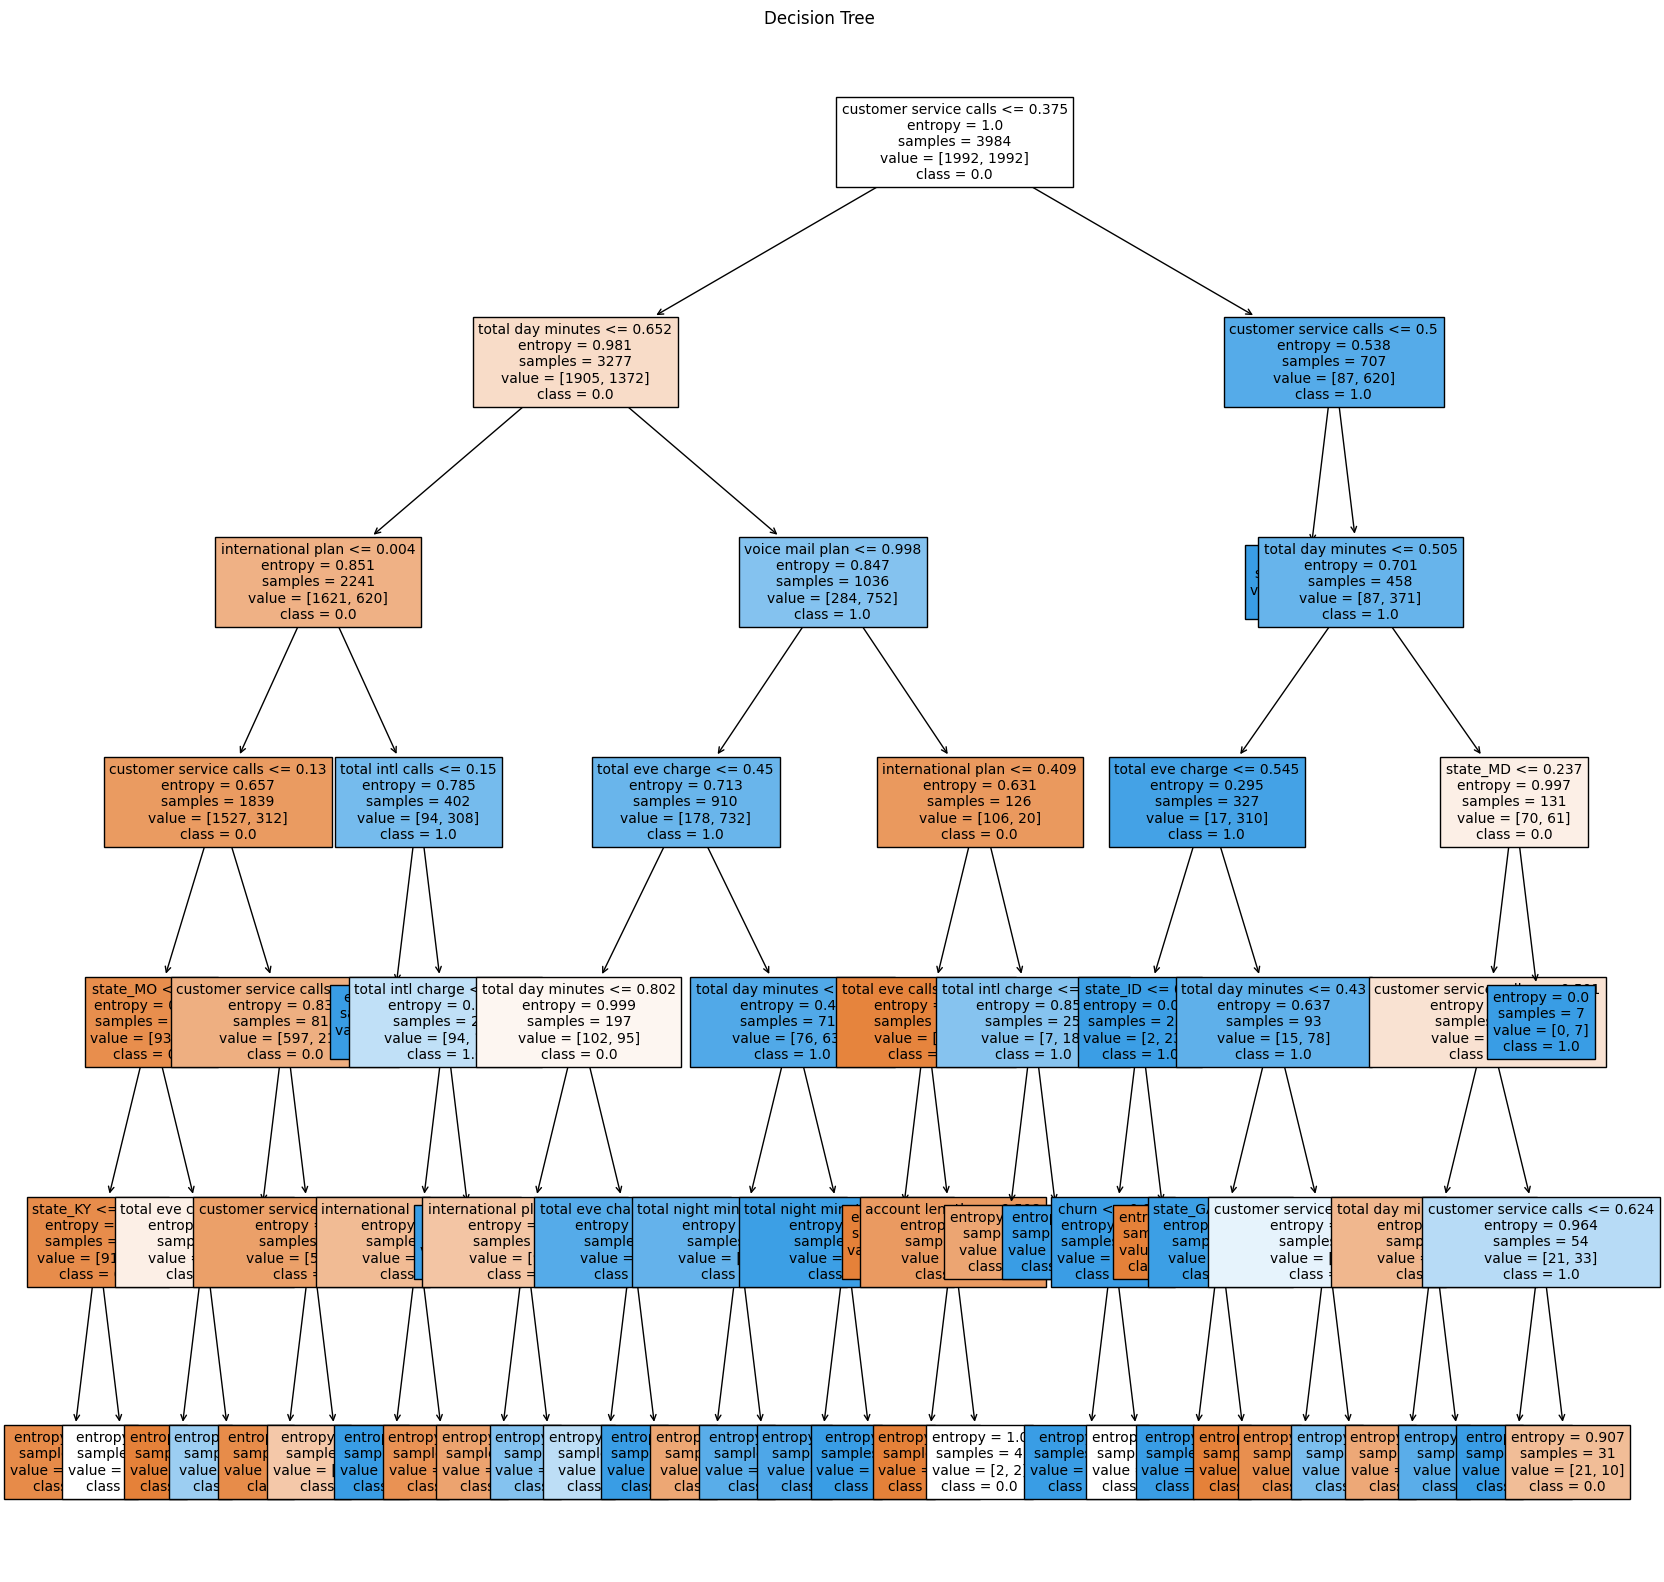

In [44]:
##predictions

pred= final_model.predict(X_test_scaled)

def modified_tree_plot(clf, feature_names, class_names):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(20, 20))

    # Plot the tree
    tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True,
                   ax=ax, fontsize=10)

    # Modify the node colors and sizes
    for node in clf.tree_.children_left:
        if node == tree._tree.TREE_LEAF:
            continue  # Skip leaf nodes
        # Get the position of the node in the plot
        x = clf.tree_.feature[node]
        y = clf.tree_.threshold[node]
        # Set the node color and size
        ax.add_patch(plt.Circle((x, y), radius=0.1, facecolor='lightgray', edgecolor='black'))

    # Set plot title and labels
    ax.set_title('Decision Tree')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Class')

    # Show the plot
    plt.show()


modified_tree_plot(final_model, feature_names= data_frame.columns, class_names=np.unique(y).astype('str'))

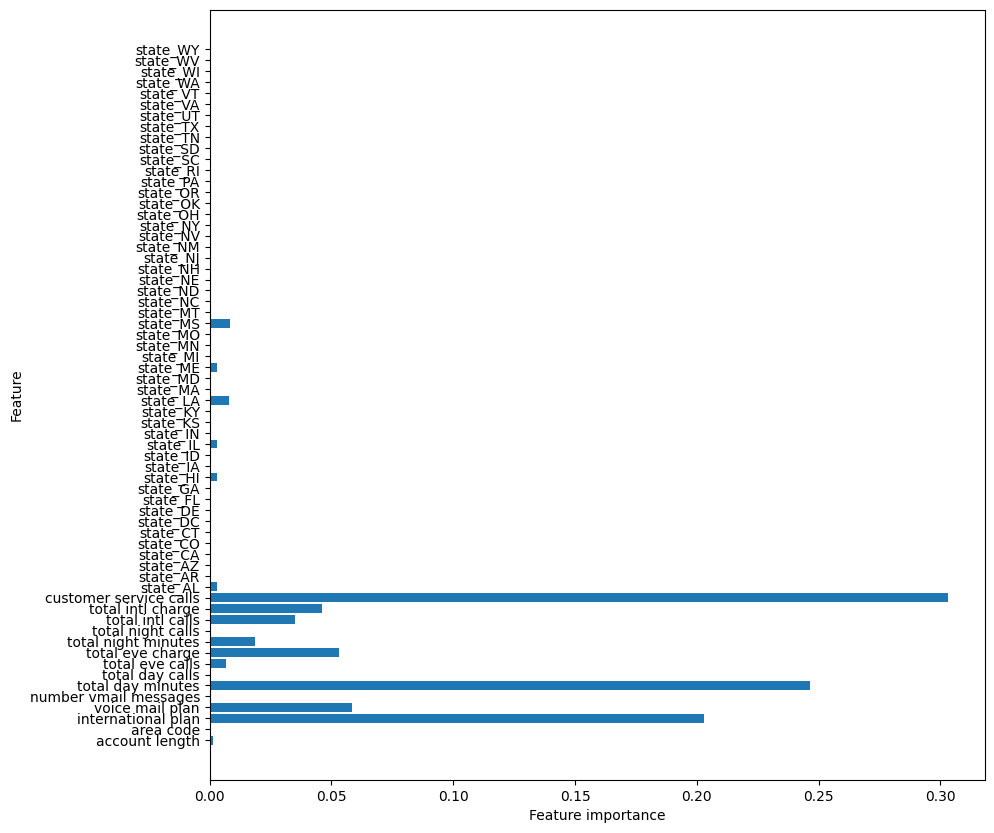

In [45]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(final_model)

The horizontal bars represent the importance of each feature, with longer bars indicating higher importance. The y-axis displays the feature names.This visualization helps identify the most influential features in the decision tree model, allowing you to understand which features have the greatest impact on the model's predictions.
For our model, the most influential predictors were; customer service calls, total day minutes, International plan, voicemail plan, total eve charge, total intl charge, total intl calls,total night minutes, total eve calls, state LA, state MS, state NJ, state ME,state IL, state HI , state AL  and account length(They are listed according to their impact in descending order).

This shows that customer service calls have the greatest impact in churn prediction thus the company should prioritize having quality customer service calls.

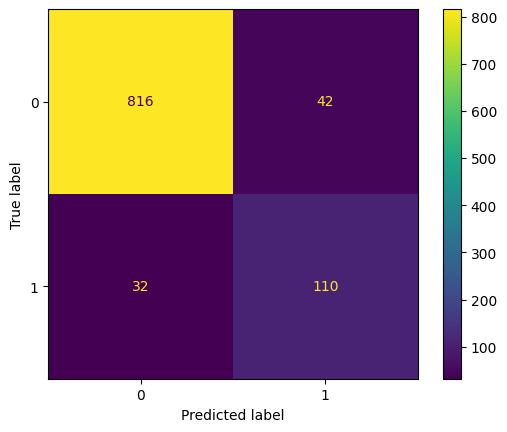

In [46]:
cf=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cf)
disp.plot()
plt.show();

The model has 110 true positives, 816 true negatives, 32 false negatives and 42 false positives.
Let's use evaluation metrics to evaluate the performance of our final model.

In [47]:
print(classification_report(y_test,pred))

def evaluation_metrics(y_test, y_pred):
  print('accuracy:',{accuracy_score(y_test, y_pred)})
  print('precision:',{precision_score(y_test, y_pred)})
  print('recall:',{recall_score(y_test, y_pred)})
  print('f1_score:',{f1_score(y_test, y_pred)})

evaluation_metrics(y_test, pred)


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       858
         1.0       0.72      0.77      0.75       142

    accuracy                           0.93      1000
   macro avg       0.84      0.86      0.85      1000
weighted avg       0.93      0.93      0.93      1000

accuracy: {0.926}
precision: {0.7236842105263158}
recall: {0.7746478873239436}
f1_score: {0.7482993197278911}


The model :
* Has an accuracy of 92.6% ie  out of 100 customers, it correctly predicts the class of 93 of them ,churn or not churn.
* Has a precision of 72.3% meaning out of the predicted positives( customers likely to churn), the model correctly predicted 72,3% of them
* Has a recall of 77.5% meaning, out of the actual positives,(the customers that did churn), the model correctly predicted 77.5% of them
* Has an f1 score of 74.8% ie  the model has a good balance between precision and recall. It means that the model is effectively identifying the positive class instances while minimizing false positives and false negatives.

> # **Conclusion**

* The predictor variables;account length, total day minutes,total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge , total intl minutes and total intl charge seem to be fairly normally distributed, total intl calls and customer service calls seem to be normally distributed but skewed to the right, area code is a discrete categorical column and number of voicemail messages, most of them were 0 but the rest seem to have a platykurtic distribution.

* Wv state seems to be having most of the customers and CA has the least customers, most of the customers don't have an international plan and also most of them don't have a voicemail plan, explaining why the majority of the data in the number of voicemail messages is 0.


* The most influential predictors were; customer service calls, total day minutes, International plan, voicemail plan, total eve charge, total intl charge, total intl calls,total night minutes, total eve calls, state LA, state MS, state NJ, state ME,state IL, state HI , state AL  and account length(They are listed according to their impact in descending order).

*  The model has a good balance between precision and recall. It means that the model is effectively identifying the positive class instances while minimizing false positives and false negatives. The model has 92.6% accuracy thus the model is suitable for churn prediction


> # **Recommendations**

* The number of customer service calls was identified as one of the most influential predictors of churn. This suggests that providing excellent customer service and addressing customer concerns promptly and effectively can significantly reduce churn. Focus on training customer service representatives to handle customer issues efficiently and provide proactive support to enhance customer satisfaction and loyalty.

* Total day minutes, total eve charge, total night minutes, and total international calls and charges were identified as influential predictors. Analyze these usage patterns further to identify any specific trends or behaviors associated with churn. For example, if customers who have high evening charges are more likely to churn, consider targeted offers or discounts to encourage retention during evening hours.

* Most customers do not have an international plan or voicemail plan. The company should consider promoting these services to customers who currently don't have them but may benefit from them.

* Since the dataset shows a significant concentration of customers in WV state and fewer customers in CA, the company should consider focusing retention efforts and marketing campaigns on these regions

*  The company should Leverage the influential predictors and usage patterns identified by the model to develop personalized retention campaigns. For example, for customers with a high number of customer service calls, consider reaching out to them proactively with special offers or personalized assistance to address their concerns and improve their experience.

> # **Future work**

* While the model currently has good accuracy and performance, we should continue monitoring and evaluating its performance on new data. As customer behaviors and preferences change over time, it's important to ensure that the model remains effective and up-to-date. 

* Exploring advanced techniques like ensemble methods, gradient boosting methods, XGboost and Adaboost , or deep learning to further improve churn prediction performance.

> # **Challenges**

* Due to the presence of high multicollinearity among several predictor variables, we had to remove some of those columns from our analysis.

* The model has some limitations, since decision trees can be biased towards the majority class if the dataset used for modeling has imbalanced class distribution,  we had to use SMOTE to solve  the class imbalance problems thus any new data fed to the model has to undergo the same preprocessing technique